## **Imports**

In [1]:
import numpy as np

# Matplotlib imports
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import griddata
import math 
import os

# Import the formatting_v3 code
from helpers.formatting_v3 import *

#from IPython.display import display, HTML
#%config InlineBackend.figure_format='retina'


plot_settings = {
    'fontsize': 14,
    'tick_width': 3,
    'tick_length': 8,
    'tick_pad': 6,
    'labelpad': 5,
    'title_fontsize': 16,
    'title_pad': 10,
    'line_color': 'royalblue',
    'face_color': '',
    'shading': 'nearest',
    'color_map': 'RdYlBu_r',
    'line_width': 2,
    'marker_size': 8,
    'x_locator': MaxNLocator(nbins=6),
    'y_locator': MaxNLocator(nbins=6, integer=True),
}

## **Load Data**

In [142]:
# Import data via the load experiment function
filename = 'data/2026-02-03/2026-02-03_Transport-24'
results = load_experiment_data(filename)

# Extract the results
meta  = results["metadata"]
step  = results["step"]
sweep = results["sweep"]
data  = results["data"]

# Get the sweep header and type
sw_header = results["sweep_headers"]
sw_type = sw_header[0].lower() if sw_header else 'unknown'

# Saving figure
save_path = create_save_path(filename, fig_type='jpg')

## **Quick 1D Plot**

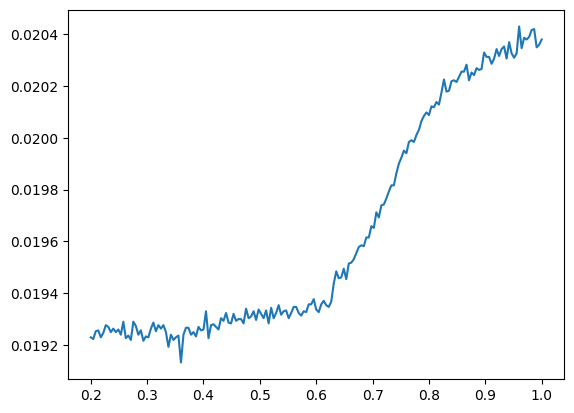

In [100]:
plt.plot(data[:,2],data[:,-2])

In [117]:
freq = np.unique(data[:,-1])
vch  = step[:,0]

S21_re = data[:,-3]
S21_im = data[:,-2]

vnamagn = 20*np.log10(np.sqrt(S21_re**2 + S21_im**2))
phas = np.arctan2(S21_im, S21_re)

ch, fq, s21 = reshape_to_2dz(vch, freq, vnamagn)

In [118]:
s21 = vnamagn.reshape(len(vch), len(freq))

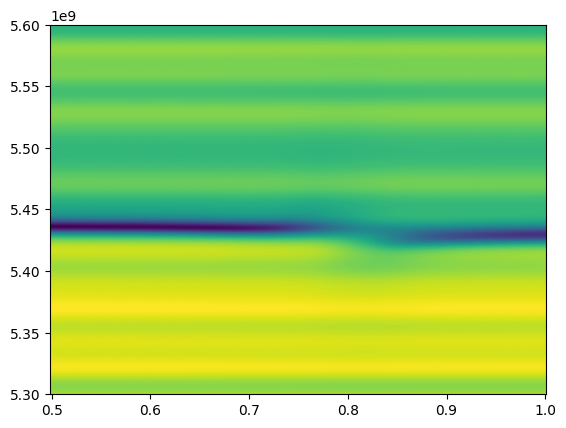

In [119]:
plt.pcolormesh(vch, freq, s21.T, shading='nearest')

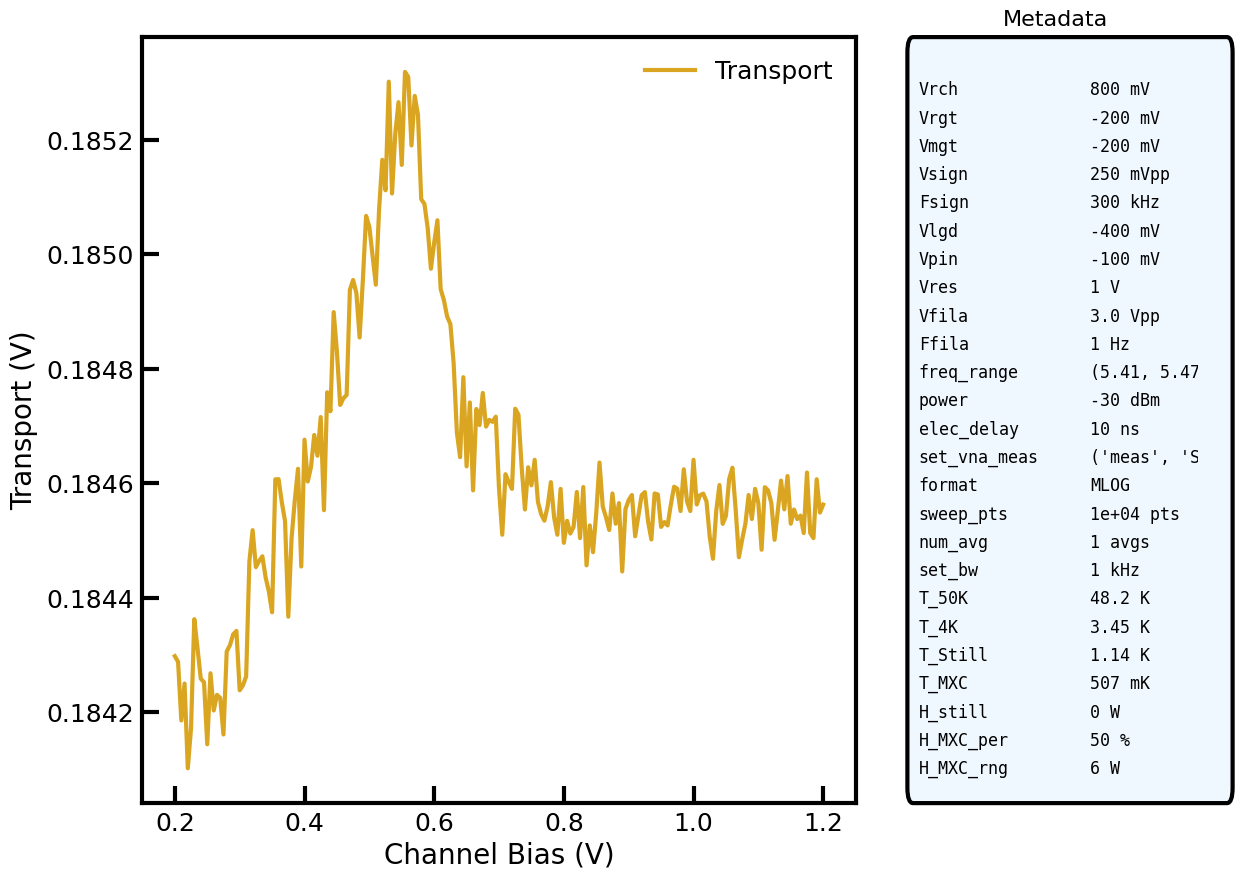

In [ ]:
fig, ax_plot, ax_meta = format_plot()

# Metadata Table
meta_table(ax_meta, meta, comm_on=True)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

font_l = 20  # Label font size
font_t = 18  # Tick font size

line_l = 12   # Tick length
line_w = 3   # Tick width

# Selecting linecut data
p_cond_idx = 7991  
x = data[:,2]
y = np.sqrt(data[:,5]**2 + data[:,6]**2)

# Data
ax_plot.plot(x, y, color='goldenrod', linestyle='-',
        linewidth=3, label='Transport')

# Axis labels (adjust text as needed)
ax_plot.set_xlabel('Channel Bias (V)', fontsize=font_l)
ax_plot.set_ylabel('Transport (V)', color='black',
              fontsize=font_l, labelpad=6)

#ax.set_xlim(5.42,5.46)
#ax.set_ylim(-90,-84)
#ax.set_yticks([-90, -88, -86, -84])
#ax.set_xlim(5.425, 5.455)
#ax.set_xticks([5.43, 5.44, 5.45])

# Style ticks to match your other figure
ax_plot.tick_params(axis='both', length=line_l, width=line_w, labelsize=font_t,
               direction='in', pad=6, colors='black')

# Spine formatting (consistent widths, neutral spine color)
for spine in ax_plot.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')

# Legend (optional, styled)
ax_plot.legend(frameon=False, fontsize=font_t, loc='best')


save_path = create_save_path(filename, fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

## **1D Plot**

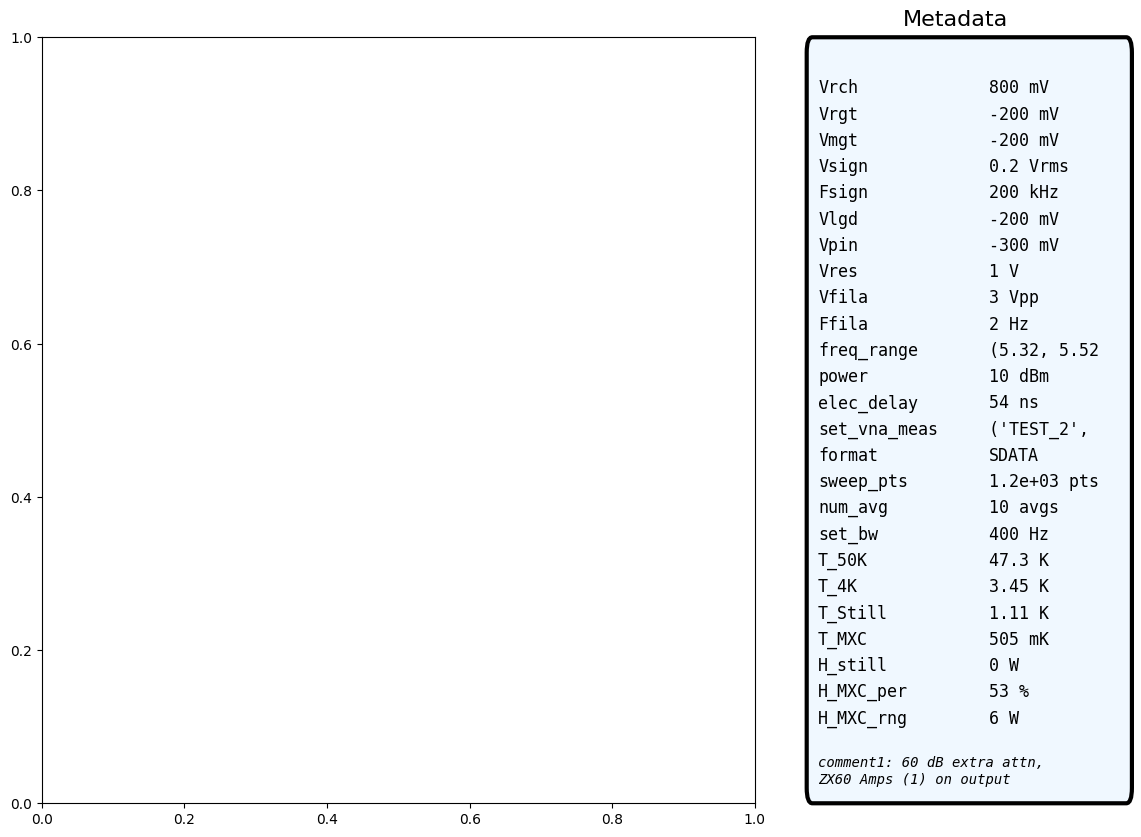

In [17]:
fig, ax_plot, ax_meta = format_plot()

# Plot Data
form_1d_plot(ax_plot, data[:,2], np.sqrt(data[:,5]**2 + data[:,6]**2), meta, filename=filename, sweep_type=sw_type,
             style=plot_settings)

# Metadata Table
meta_table(ax_meta, meta, comm_on=True)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

## **2D Plot**

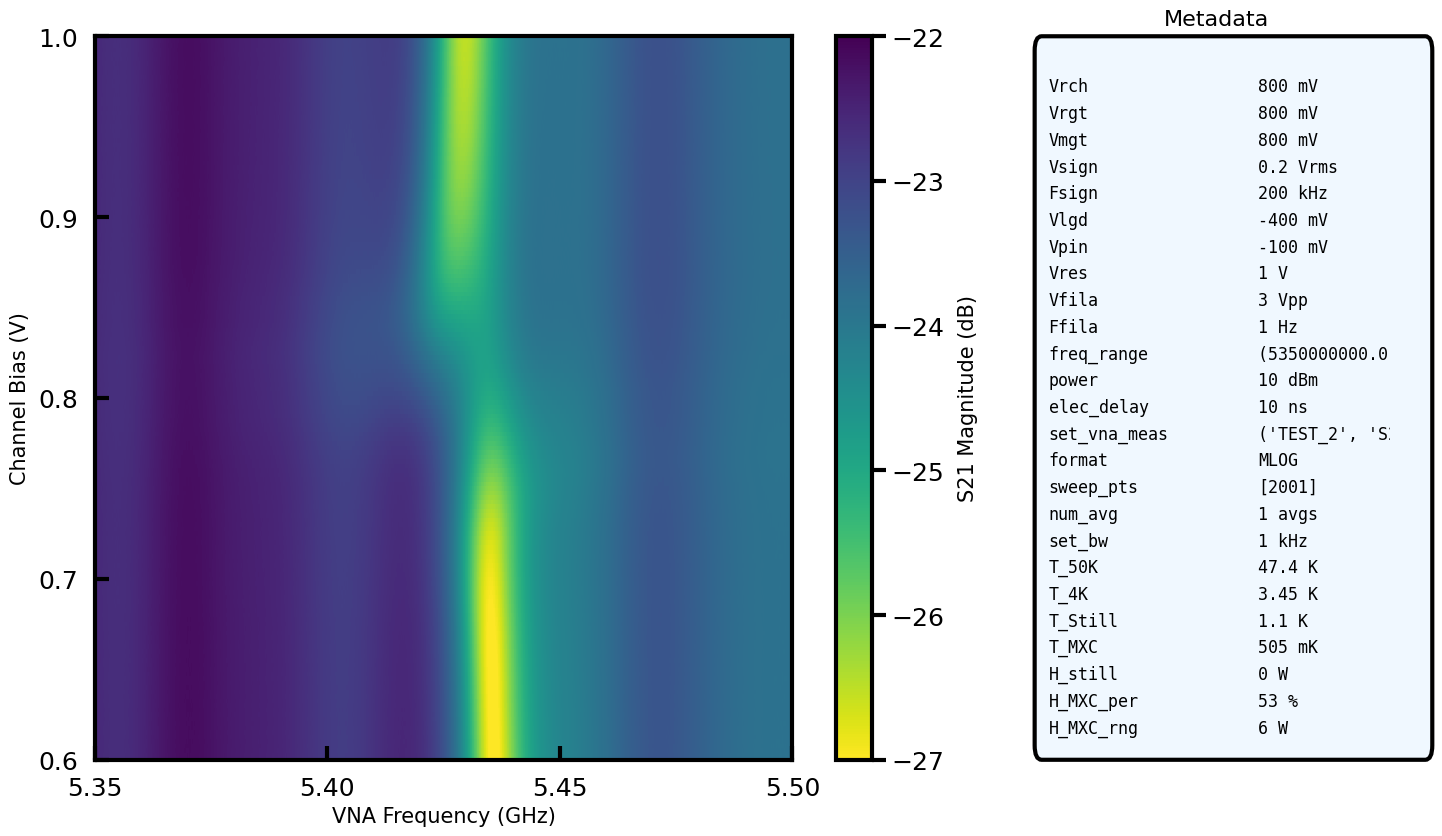

In [ ]:
fig, ax_plot, ax_meta = format_plot(fig_tall=9, fig_wide=15)

# Plot Data
'''
x, y, z = form_2d_plot(ax_plot, 
                       data, meta, 
                       filename=filename, 
                       #vmin=-105,
                       #vmax=-85,
                       sweep_type=sw_type, style=plot_settings,
                       sdata_phase=False)
'''

font_t = 18

pcm = ax_plot.pcolormesh(freq*1e-9, vch, s21, shading='nearest',
                         cmap='viridis_r', vmax=-22, vmin=-27)

# Axis labels (adjust text as needed)
ax_plot.set_xlabel('VNA Frequency (GHz)', fontsize=font_l)
ax_plot.set_ylabel('Channel Bias (V)', color='black',
              fontsize=font_l, labelpad=6)


ax_plot.set_xlim(5.35, 5.50)
ax_plot.set_ylim(0.6, 1.0)
ax_plot.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax_plot.set_xticks([5.35, 5.40, 5.45, 5.50])


# Style ticks to match your other figure
ax_plot.tick_params(axis='both', length=line_l, width=line_w, 
                    labelsize=font_t,
               direction='in', pad=12, colors='black')

# Colorbar
cbar = plt.colorbar(pcm, ax=ax_plot)
cbar.ax.tick_params(axis='y', length=line_l, width=line_w, 
                    labelsize=font_t)
cbar.set_label('S21 Magnitude (dB)', fontsize=font_l, labelpad=10)
cbar.ax.yaxis.set_tick_params(width=line_w, length=line_l, 
                                   direction='out', 
                                   color='black')

# Spines
for spine in ax_plot.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')
for spine in cbar.ax.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')

# Metadata Table
meta_table(ax_meta, meta, comm_on=True)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

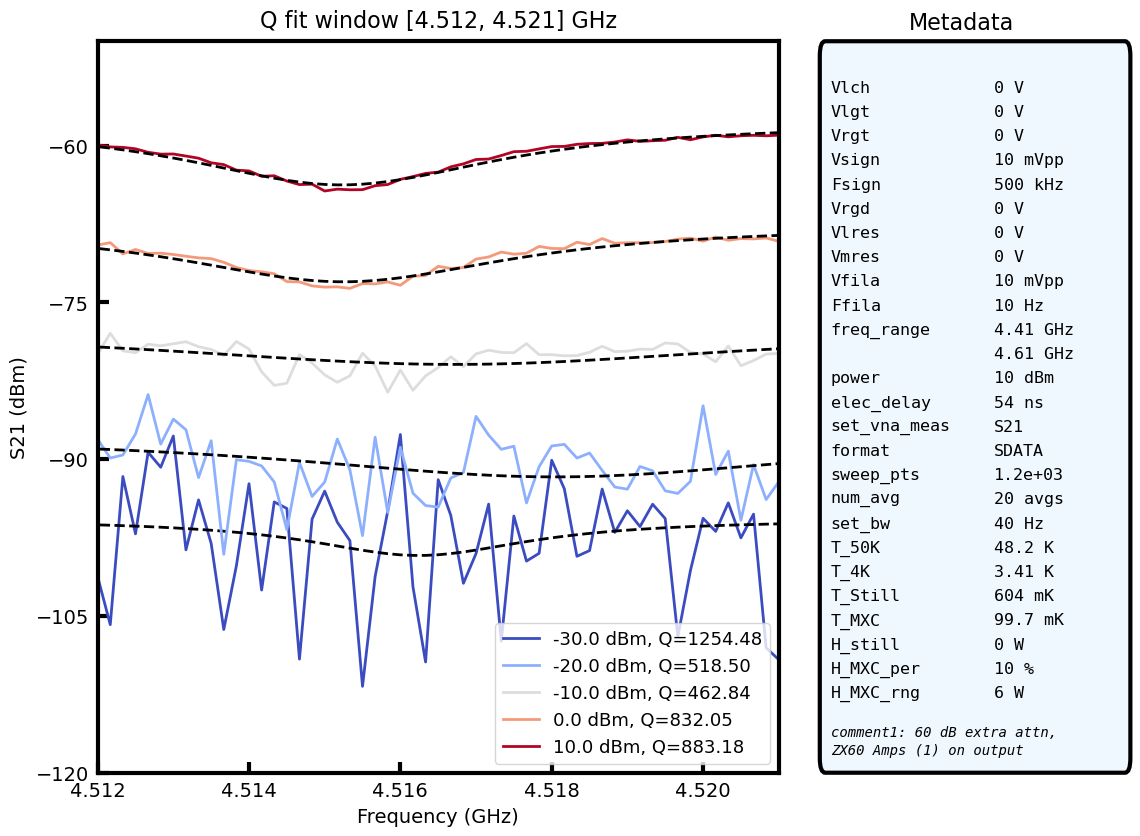

In [24]:
fig, ax_plot, ax_meta = format_plot(fig_tall=9)

p0_guess = [6, 4.515, 0.005, -95]

plot_waterfall(ax_plot, x, y, z, 
               y_indices=[0, 20, 40, 60, 80], 
               offset_step=10,
               style=plot_settings,
               do_fits=True,
               cmap_name='coolwarm',
               user_guess=p0_guess)

# Metadata Table
meta_table(ax_meta, meta, comm_on=True)

ax_plot.set_ylim(-120,-50)
ax_plot.set_xlim(4.512,4.521)

ax_plot.set_title('Q fit window [4.512, 4.521] GHz', fontsize=plot_settings['title_fontsize'], pad=plot_settings['title_pad'])
# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

The below code is used to get a line cut from the prior 2D plot.    

883.1777287196365


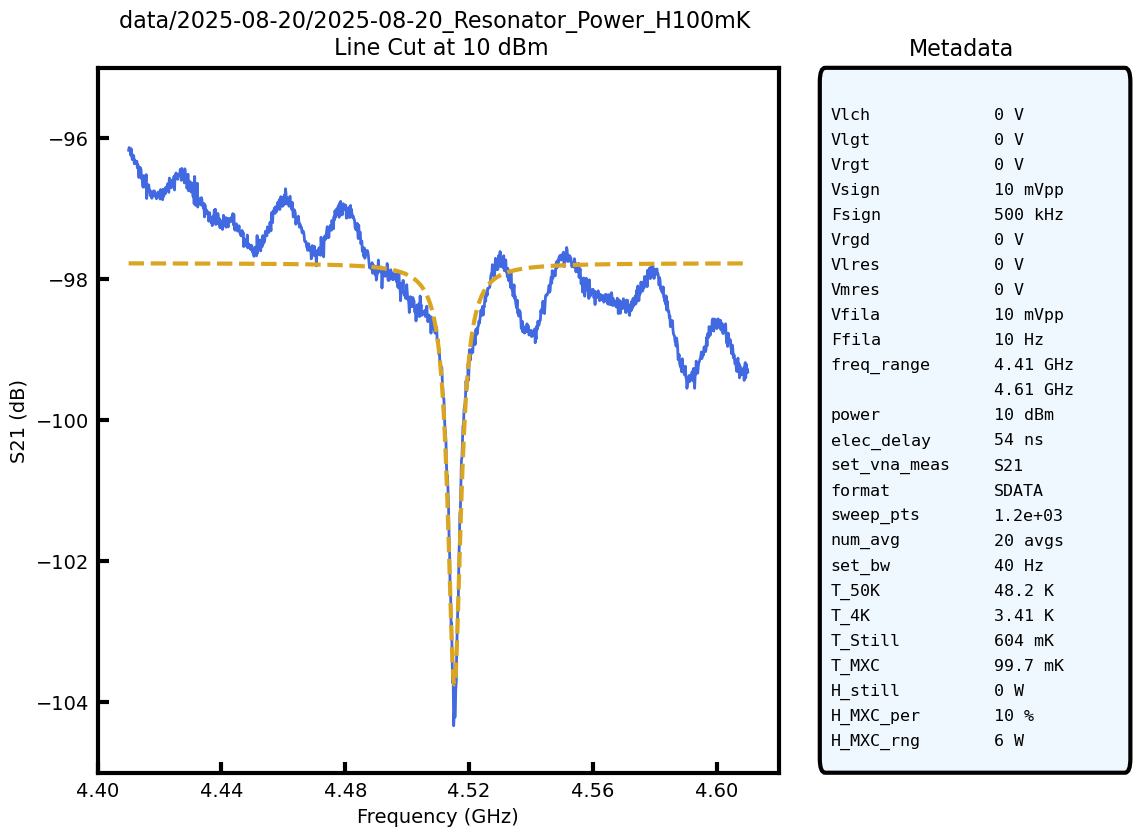

In [28]:
fig, ax_plot, ax_meta = format_plot()

# Get a linecut at a specific value
val = 10
unit = 'dBm'
axs = 'y'

# Plot the linecut
cut_x, cut_vals = get_linecut(x, y, z, axis=axs, value=val)
plot_linecut(ax_plot, cut_x, cut_vals, xlabel="Frequency (GHz)", ylabel="S21 (dB)", 
             filename=filename + f" \n Line Cut at {val} " + unit, style=plot_settings)

popt = fit_data(cut_x, cut_vals, fit_type='lorz_inv', user_guess=p0_guess)[0]
lor  = lorz_inv(cut_x, *popt)

ax_plot.plot(cut_x, lor, color='goldenrod', linestyle='--', linewidth=3)

q = popt[1] / popt[2]
print(q)
# Metadata Table
meta_table(ax_meta, meta, comm_on=False)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=400, bbox_inches='tight')

## **Multi-Set Plotting**

In [123]:
# Import data via the load experiment function
db_files = [
    
            'data/2025-07-29/2025-07-29_Resonator_Power_34mK',    # Empty, Low
            'data/2025-07-29/2025-07-29_Resonator_Power_34mK-1',  # Empty, High
            'data/2025-07-30/2025-07-30_Resonator_Power_128mK',   # Empty, Low
            'data/2025-07-30/2025-07-30_Resonator_Power_128mK-1', # Empty, High
            'data/2025-07-31/2025-07-31_Resonator_Power_309mK',   # Empty, Low (Q-testing)
            'data/2025-07-30/2025-07-30_Resonator_Power_309mK',   # Empty, High
    
            'data/2025-08-19/2025-08-19_Resonator_Power_H65mK',   # Helium, Low
            'data/2025-08-18/2025-08-18_Resonator_Power_H65mK',   # Helium, High
            'data/2025-08-20/2025-08-20_Resonator_Power_H100mK',  # Helium, Low
            #
            'data/2025-08-18/2025-08-18_Resonator_Power_H153mK',  # Helium, Low
            'data/2025-08-17/2025-08-17_Resonator_Power_H153mK',  # Helium, High
           
           ]

load_sets = [load_experiment_data(path) for path in db_files]

exp_sets = {}
for inx, loaded in enumerate(load_sets, start=1):
    exp_sets[f"Set_{inx}"] = {
        "metadata": loaded["metadata"],
        "step": loaded["step"],
        "sweep": loaded["sweep"],
        "data": loaded["data"],
        "sweep_headers": loaded["sweep_headers"],
        "step_headers": loaded["step_headers"]
    }

# Data Set Labels --------------------------------------------------------------- #

# Set number, label, power offset, and guess power for each set
labels = [
    ("Set_1",  "34 mK (60dB, E)", 120, -95),
    ("Set_2",  "34 mK (20dB, E)",  80, -55),
    ("Set_3", "128 mK (60dB, E)", 120, -95),
    ("Set_4", "128 mK (20dB, E)",  80, -55),
    ("Set_5", "309 mK (60dB, E)", 120, -95),
    ("Set_6", "309 mK (20dB, E)",  80, -55),

    ("Set_7",  "65 mK (60dB, H)", 120, -95),
    ("Set_8",  "65 mK (20dB, H)",  80, -55),
    ("Set_9", "100 mK (60dB, H)", 120, -95),
    #("Set_10", "100 mK (20dB, H)",  80, -55),
    ("Set_11", "153 mK (60dB, H)", 120, -95),
    ("Set_12", "153 mK (20dB, H)",  80, -55),

]

# Color Lists ------------------------------------------------------------------- #

paired_cl = [ 'darkorange',    'sandybrown',
             'forestgreen',     'limegreen',
               'royalblue',       'skyblue',
               'firebrick',    'lightcoral',
              'darkorchid',          'plum',
                'darkcyan', 'lightseagreen']
# Split the triple color list into lists for dark, light, and face colors
dark_cl   = paired_cl[0::2]
light_cl  = paired_cl[1::2]
face_cl   = [       'bisque',
                  'honeydew', 
                     'azure', 
                 'mistyrose', 
             'lavenderblush', 
             'paleturquoise']

# Figure name and save path configuration --------------------------------------- #

last_path = db_files[-1]
save_dir = os.path.dirname(last_path)
# Start with a base name
base_name = "MultiSet_Plot"
# Create a unique filename 
save_path = get_unique_filename(save_dir, base_name, extension='.jpg')

Color Pairings:
royalblue - aliceblue
skyblue - azure
firebrick - mistyrose
goldenrod - cornsilk

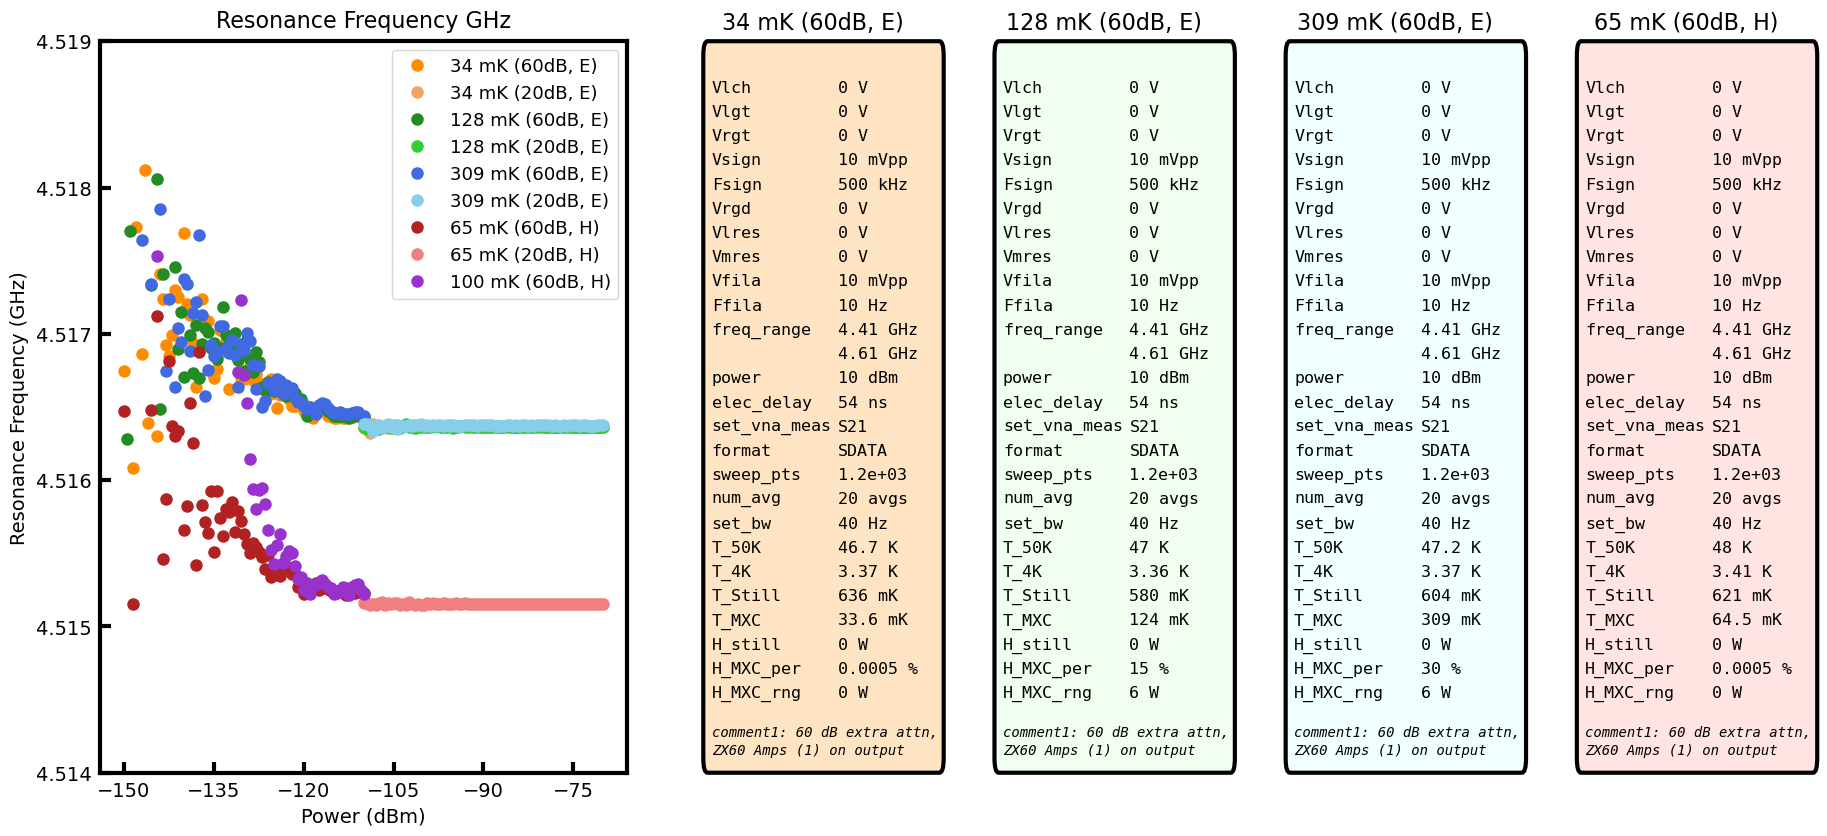

In [129]:
# Select Data Sets to Plot ------------------------------------------------------ #

selected_indices = [0,1,2,3,4,5,6,7,8]
meta_indices     = [0,2,4,6]
selected_labels  = [labels[i] for i in selected_indices]
plot_for         = 'fres'
colors           = paired_cl[:len(selected_indices)]
q_x_window       = [4.490, 4.543]  # Frequency window for quality factor fitting

# Plotting ---------------------------------------------------------------------- #

plot_entries = []
titles       = []

for idx, (set_name, label, power_offset, guess_power) in enumerate(selected_labels):
    
    # Unpackage data
    data = exp_sets[set_name]["data"]
    x = data[:, 6]                            # Frequency (GHz)
    y = data[:, 3]                            # Power (dBm)
    r = data[:, 4]                            # Real part of S21 (dB)
    i = data[:, 5]                            # Imaginary part of S21 (dB)
    z = 20 * np.log10(np.sqrt(r**2 + i**2))   # S21 magnitude (dB)
    # Reshape data to a 2D z-array
    xb, yb, zb = reshape_to_2dz(x, y, z)

    # Fit to get resonance frequency (in GHz)
    if plot_for == 'fres':
        fres = []
        for i in range(len(yb)):
            try:
                popt = fit_data(xb, zb[i,:], fit_type='lorz_inv')[0][1]
            except:
                popt = 0
            fres.append(popt*1e-9)
        plot_entries.append({
            "x": yb - power_offset,
            "y": fres,
            "label": label,
            "color": colors[idx],
            "marks": "o"})
        plot_config = {
            "xlabel": "Power (dBm)",
            "ylabel": "Resonance Frequency (GHz)",
            "filename": "Resonance Frequency GHz",
            "log_y": False,
            "ylims": (4.514, 4.519)}

    # Fit to get quality factor
    elif plot_for == 'qfit':
        pow, q = quality_fits(x, y, z, user_guess=[6, 4.515, 0.005, guess_power],
                            x_window_min=q_x_window[0], x_window_max=q_x_window[1])
        plot_entries.append({
            "x": pow - power_offset,
            "y": q,
            "label": label,
            "color": colors[idx],
            "marks": "o"})
        plot_config = {
            "xlabel": "Power (dBm)",
            "ylabel": "Quality Factor",
            "filename": f"Q fit window {q_x_window} GHz",
            "log_y": False,
            "ylims": (1000, 1200)}

        
    # Must pick a valid plot_for
    else:
        print("Error: plot_for must be 'fres' or 'qfit'")
        break
    # Append the label and plot entry
    titles.append(label)



fig, ax_plot, ax_meta_list = form_plot(num_meta=4) 


for meta_ax, meta_index in zip(ax_meta_list, meta_indices):
    set_name, label, *_ = labels[meta_index]
    plot_color = colors[meta_index]

    if plot_color in dark_cl:
        # Direct mapping for dark_cl
        face_color = face_cl[dark_cl.index(plot_color)]
    elif plot_color in paired_cl:
        # Grouped mapping for paired_cl
        face_color = face_cl[meta_index // 2]
    else:
        face_color = "white"  # fallback

    meta_table(meta_ax, exp_sets[set_name]["metadata"], 
               title=label, facecolor=face_color, comm_on=True)





plot_exp_sets(
    ax_plot,
    plot_entries,
    style=plot_settings,
    **plot_config)

fig.subplots_adjust(bottom=0.3)
# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Save the figure
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

## **Pressure Data**

In [24]:
# Import data via the load experiment function
filename = 'data/2025-11-24/2025-11-24_pressure_line_recording'
results = load_experiment_data(filename)

# Extract the results
seconds  = results["table_measurements"][:,0]
time_str = results["table_measurements"][:,1]
press_1  = results["table_measurements"][:,2]
press_2  = results["table_measurements"][:,3]

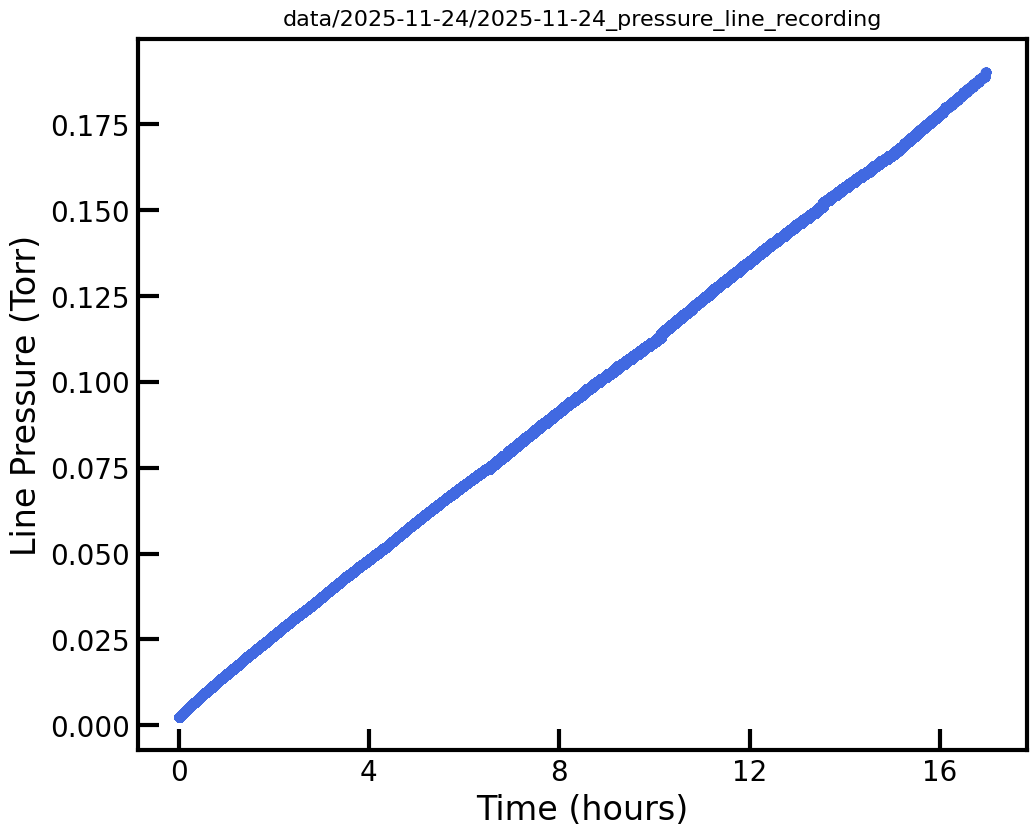

In [26]:
fig, ax_plot = form_plot(num_meta=0)

# Plot Data
form_1d_plot(ax_plot, seconds/3600, press_2, filename=filename, 
             sweep_type='pressure2', style=plot_settings, plot_style='o')

ax_plot.set_yscale('linear')
ax_plot.set_xlabel('Time (hours)', fontsize= 24)
ax_plot.set_ylabel('Line Pressure (Torr)', fontsize= 24)
#ax_plot.set_xlim(0,9)
#ax_plot.set_ylim(1e-3, 2e-1)

ax_plot.tick_params(axis='both', which='major', length=15, labelsize=20)

# Add tight_layout to the figure
fig.tight_layout(pad=3.0)

# Saving figure
save_path = create_save_path(filename, fig_type='jpg')

# Save the figure
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

## **Oscilloscope Response**

In [458]:
# Import data via the load experiment function
filename = 'data/2026-01-14/2026-01-14_Filament_Scope-J8_Bias-J5_B'
results = load_experiment_data(filename)

j_str = 'J5'
e_typ = 'res'

# Extract the results
meta    = results["metadata"]
volts   = results["table_measurements"][:,0].astype(float)
seconds = results["table_measurements"][:,1].astype(float)
oscfila = results["table_measurements"][:,2].astype(float)
oscvolt = results["table_measurements"][:,3].astype(float)



sourced = np.unique(volts)
timings = np.unique(seconds)*1e3  # convert to ms
V, T = np.meshgrid(sourced, timings, indexing='ij') 

points = results["table_measurements"][:, [0, 1]]  # amplitude, time
Vfila  = results["table_measurements"][:, 2]       # filament voltage
Velct  = results["table_measurements"][:, 3]       # electrode voltage
points[:, 1] *= 1e3  # convert to ms to match T

# Interpolate onto full grid
grid_Vfila = griddata(points, Vfila, (V, T), method='nearest')
grid_Velct = griddata(points, Velct, (V, T), method='nearest')

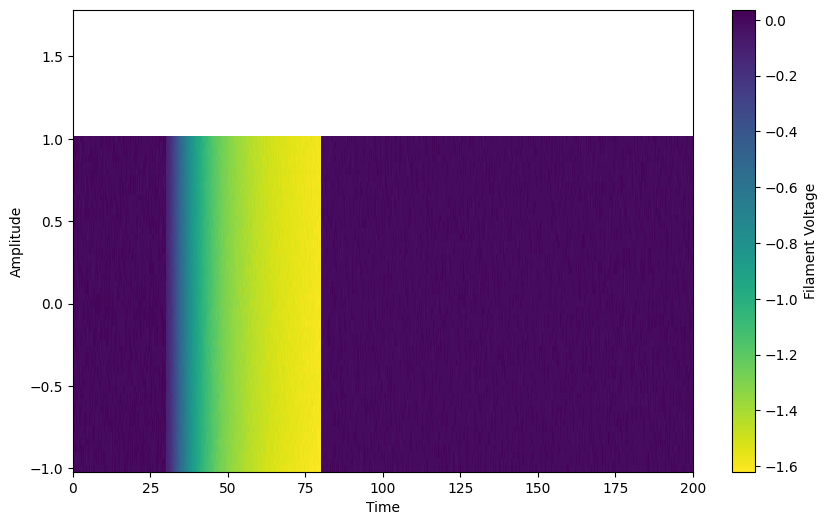

(51, 4000)


In [459]:

plt.figure(figsize=(10, 6))
plt.pcolormesh(T, V, grid_Vfila, shading='auto', cmap='viridis_r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.colorbar(label='Filament Voltage')

plt.hlines(1.65, timings[0], timings[-1], colors='white', lw=2 )
plt.show()

print(np.shape(grid_Velct))

C:\Users\LHQS3\AppData\Local\Temp\ipykernel_15428\1936623693.py:8: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 2 Axes> than <Figure size 1200x600 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(pcm)


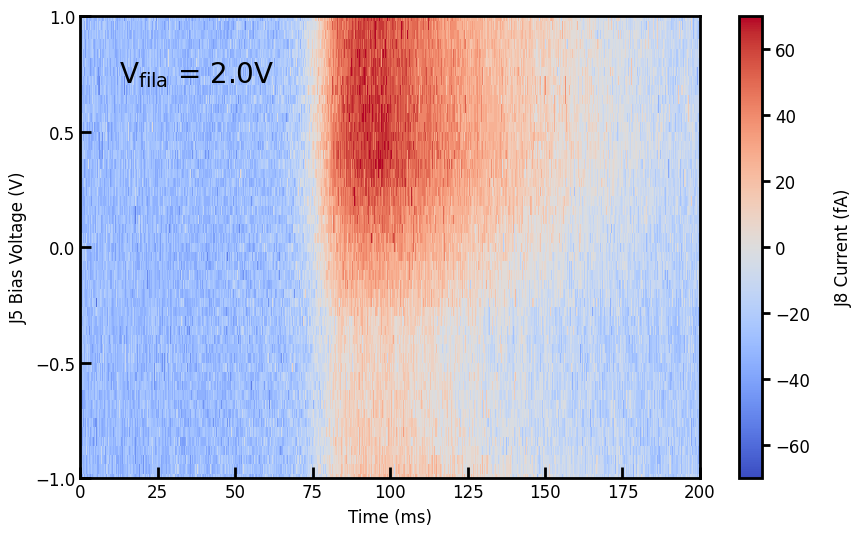

In [460]:
plt.figure(figsize=(10, 6))

nApV = 100

pcm =plt.pcolormesh(T, V, grid_Velct / nApV * 1e6, cmap='coolwarm',
                      vmin=-70,  vmax=70, 
                      shading='nearest')
cbar = fig.colorbar(pcm)
cbar.set_label('J8 Current (fA)', fontsize=12, labelpad=18)
cbar.ax.tick_params(axis='y', length=6, width=2, labelsize=12)
#cbar.ax.yaxis.set_ticks([-10, -5, 0, 5, 10])
cbar.ax.yaxis.set_tick_params(direction='out', color='black')

plt.ylabel('J5 Bias Voltage (V)', fontsize=12, labelpad=5)
plt.xlabel('Time (ms)', fontsize=12, labelpad=5)
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.ylim(-1,1)
plt.tick_params(axis='both', length=8, width=2, labelsize=12, direction='in')

plt.text(37.5, 0.75, r'V$_{\text{fila}}$ = 2.0V', color='black', fontsize=20, ha='center', va='center')
#plt.text(40, 0.6, e_typ, color='white', fontsize=16, ha='center', va='center')


# Spines styling
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')
for spine in cbar.ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

save_path = create_save_path(filename + '_colors', fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

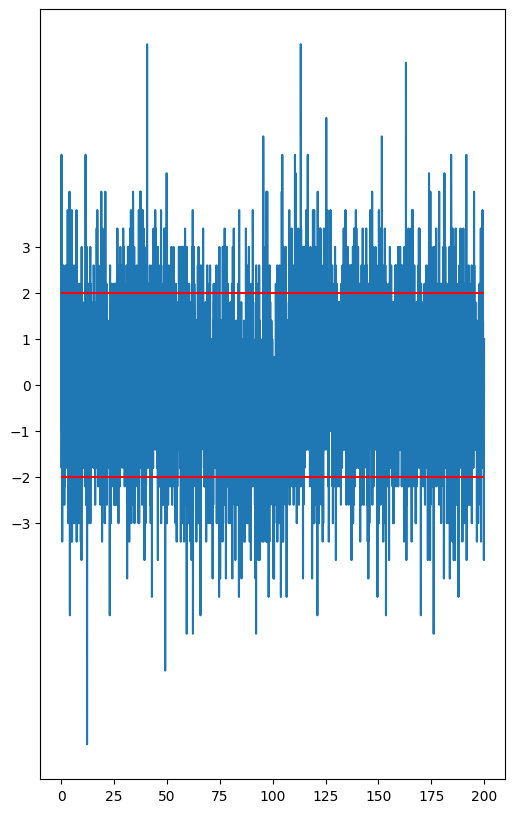

In [212]:
plt.figure(figsize=(6, 10))
plt.plot(T[-1,:], grid_Velct[-1,:]*1e3)
plt.yticks([-3,-2,-1,0,1,2,3])

plt.hlines(2,0,200, color='red')
plt.hlines(-2,0,200, color='red')

In [178]:
V[-1,1]

2.4

C:\Users\LHQS3\AppData\Local\Temp\ipykernel_15428\90757129.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cool_segment = cm.get_cmap('coolwarm')


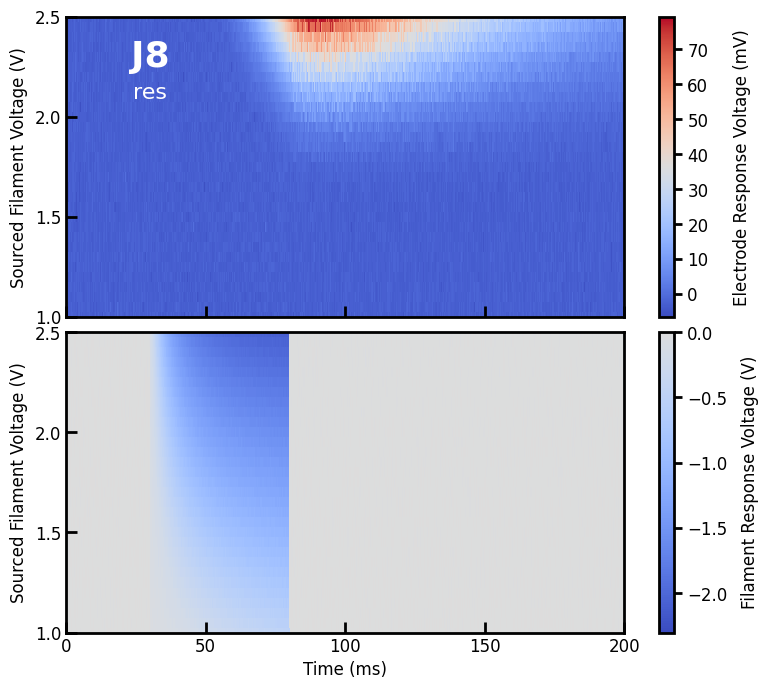

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8), sharex=True,
                    gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.05})

cool_segment = cm.get_cmap('coolwarm')
cool_segment = mcolors.LinearSegmentedColormap.from_list(
    'cool_segment', cool_segment(np.linspace(0, 0.50, 256))
)

# --- Top Panel: Electrode Response ---
pcm1 = ax1.pcolormesh(T, V, grid_Velct * 1e3, cmap='coolwarm',
#                      vmin=-4, # vmax=10, 
                      shading='nearest')
cbar1 = fig.colorbar(pcm1, ax=ax1)
cbar1.set_label('Electrode Response Voltage (mV)', fontsize=12, labelpad=18)
cbar1.ax.tick_params(axis='y', length=6, width=2, labelsize=12)
#cbar1.ax.yaxis.set_ticks([-10, -5, 0, 5, 10])
cbar1.ax.yaxis.set_tick_params(direction='out', color='black')

ax1.set_ylabel('Sourced Filament Voltage (V)', fontsize=12, labelpad=5)
ax1.set_yticks([1.0, 1.5, 2.0, 2.5])
ax1.set_ylim(1.0, 2.5)
ax1.tick_params(axis='both', length=8, width=2, labelsize=12, direction='in')

ax1.text(30, 2.3, j_str, color='white', fontsize=26, ha='center', va='center',
         fontweight='bold')
ax1.text(30, 2.12, e_typ, color='white', fontsize=16, ha='center', va='center')

# --- Bottom Panel: Filament Pulse ---
pcm2 = ax2.pcolormesh(T, V, grid_Vfila, cmap=cool_segment,
                      vmin=-2.3, vmax=0, 
                      shading='nearest')
cbar2 = fig.colorbar(pcm2, ax=ax2)
cbar2.set_label('Filament Response Voltage (V)', fontsize=12, labelpad=10)
cbar2.ax.tick_params(axis='y', length=6, width=2, labelsize=12)
cbar2.ax.yaxis.set_tick_params(direction='out', color='black')

ax2.set_xlabel('Time (ms)', fontsize=12)
ax2.set_ylabel('Sourced Filament Voltage (V)', fontsize=12, labelpad=5)
ax2.set_yticks([1.0, 1.5, 2.0, 2.5])
ax2.set_ylim(1.0, 2.5)
ax2.tick_params(axis='both', length=8, width=2, labelsize=12, direction='in')

# Shared X ticks
ax2.set_xticks([0, 50, 100, 150, 200])

# Spines styling
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')
for spine in cbar1.ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')
for spine in cbar2.ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

save_path = create_save_path(filename + '_colors', fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

In [213]:
mag_cold = [    1,   34,   23,    1,   60,   15,    18]
J_val    = [ 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']
mag_warm = [    1,   77,   19,    1,   53,    1,    25]



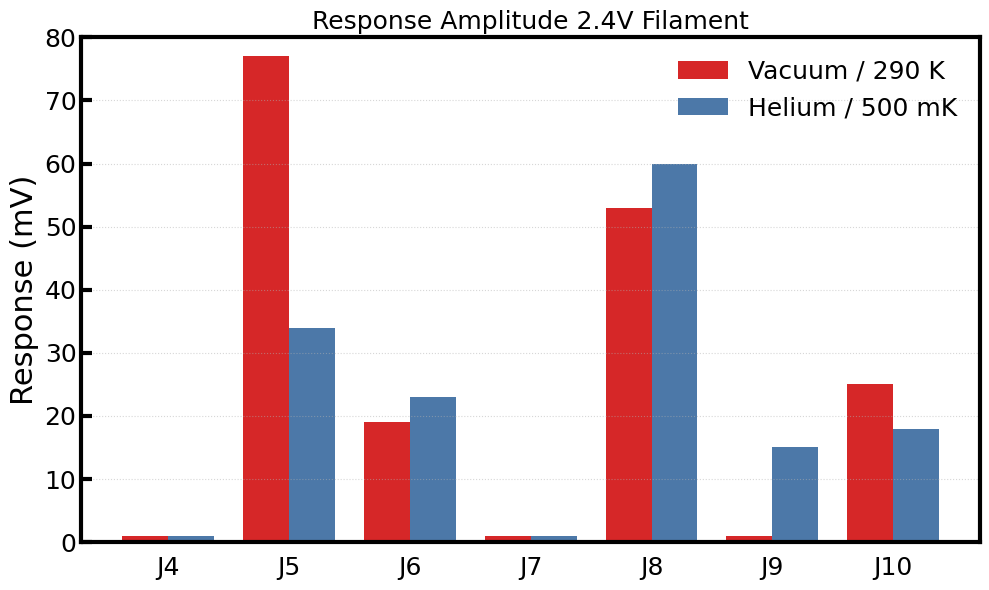

In [219]:
def plot_paired_bars(categories, before, after, *,
                     title="Response Amplitude 2.4V Filament",
                     before_label="Vacuum / 290 K",
                     after_label="Helium / 500 mK",
                     colors=("#d62728", "#4C78A8"),
                     annotate_diff=True,
                     rotation=0,
                     figsize=(10, 6),
                     title_fontsize=18,
                     label_fontsize=22,
                     tick_fontsize=18,
                     spine_thickness=3):
    # Basic validations
    if not (len(categories) == len(before) == len(after)):
        raise ValueError("categories, before, and after must be the same length")
    if len(categories) == 0:
        raise ValueError("Input lists must not be empty")

    x = np.arange(len(categories))  # the label locations
    width = 0.38                    # the width of the bars

    fig, ax = plt.subplots(figsize=figsize)

    # Bars
    ax.bar(x - width/2, before, width, label=before_label, color=colors[0])
    ax.bar(x + width/2, after,  width, label=after_label,  color=colors[1])

    # Aesthetics
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xticks(x)
    ax.set_ylim(0,80)
    ax.tick_params(axis='x', direction='in', length=0, width=0, pad=10)
    ax.tick_params(axis='y', length=8, width=3, labelsize=tick_fontsize, direction='in')
    ax.set_xticklabels(categories, rotation=rotation, fontsize=tick_fontsize)
    ax.set_ylabel("Response (mV)", fontsize=label_fontsize)
    ax.legend(fontsize=tick_fontsize, frameon=False)
    ax.grid(axis='y', linestyle=':', alpha=0.5)

    # Adjust spine thickness
    for spine in ax.spines.values():
        spine.set_linewidth(spine_thickness)

    fig.tight_layout()
    return fig, ax


# Create the figure
fig, ax = plot_paired_bars(J_val, mag_warm, mag_cold, rotation=0)

save_path = create_save_path(filename + '_bars', fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

plt.show()


C:\Users\LHQS3\AppData\Local\Temp\ipykernel_16148\3705444341.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds = cm.get_cmap('Reds')
C:\Users\LHQS3\AppData\Local\Temp\ipykernel_16148\3705444341.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues')


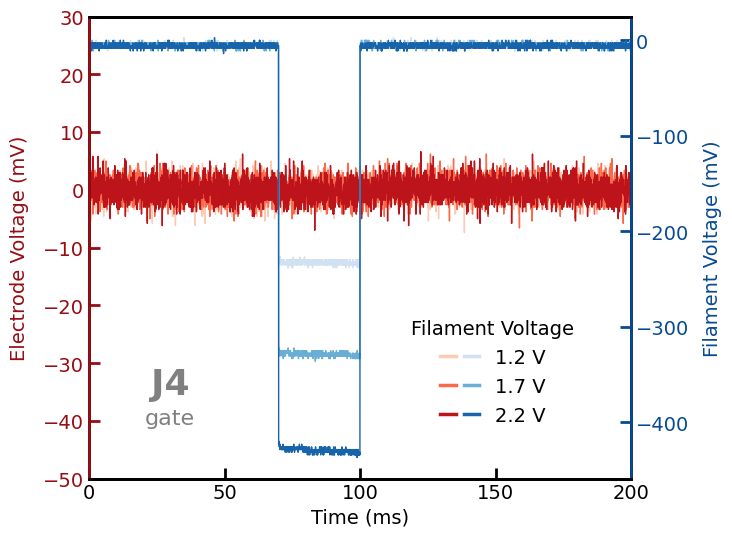

In [ ]:

from matplotlib.legend_handler import HandlerTuple
from matplotlib.lines import Line2D

# Y-values for linecuts
y_vals = [1.2, 1.7, 2.2]
voltages = np.unique(volts)

# Colormaps for line styles
reds = cm.get_cmap('Reds')
blues = cm.get_cmap('Blues')

fig, ax1 = plt.subplots(figsize=(7, 6))

# Create second y-axis
ax2 = ax1.twinx()

custom_handles = []
for i, y in enumerate(y_vals):
    idx = np.argmin(np.abs(voltages - y))
    
    # Create custom legend handles
    handle = Line2D([0], [0], color=reds(0.2 + i*0.3), linewidth=2.5)
    handle2 = Line2D([0], [0], color=blues(0.2 + i*0.3), linewidth=2.5)
    custom_handles.append((handle, handle2))

    # Extract linecuts
    electrode_line = osc_vo[idx, :] * 1e3  # Electrode in mV
    filament_line = osc_fi[idx, :] * 1e3   # Filament in mV
    # Plot electrode response on ax1 (Reds)
    ax1.plot(times, electrode_line, color=reds(0.2 + i*0.3),
             linewidth=1, label=f'Electrode @ {y:.1f} V')
    # Plot filament response on ax2 (Blues)
    ax2.plot(times, filament_line, color=blues(0.2 + i*0.3),
             linewidth=1, label=f'Filament @ {y:.1f} V')

# Axis labels
ax1.set_xlabel('Time (ms)', fontsize=14)
ax1.set_ylabel('Electrode Voltage (mV)', fontsize=14, color=reds(0.9), labelpad=10)
ax2.set_ylabel('Filament Voltage (mV)', fontsize=14, color=blues(0.9), 
               labelpad=10)

# Legend for filament voltages
ax1.legend(custom_handles, [f'{y:.1f} V' for y in y_vals],
           handler_map={tuple: HandlerTuple(ndivide=None)},
           title='Filament Voltage', fontsize=14, loc=(0.58, 0.10),
           frameon=False, title_fontsize=14)


ax2.text(30, -360, j_str, color='gray', fontsize=26, ha='center', va='center',
         fontweight='bold')
ax2.text(30, -395, e_typ, color='gray', fontsize=16, ha='center', va='center')


# Tick styling
ax1.tick_params(axis='y', length=8, width=2, labelsize=14, direction='in',
                 colors=reds(0.9))
ax1.tick_params(axis='x', length=8, width=2, labelsize=14, direction='in',
                 colors='black')
ax2.tick_params(axis='y', length=8, width=2, labelsize=14, direction='in',
                 colors=blues(0.9))

# Shared x-axis ticks
ax1.set_xlim(0, 200)
ax1.set_xticks([0, 50, 100, 150, 200])
ax1.set_ylim(-50, 30)

# Spines
# Spine formatting
for spine in ax1.spines.values():
    spine.set_linewidth(2)
for spine in ax2.spines.values():
    spine.set_linewidth(2)
ax2.spines['left'].set_color(reds(0.9))
ax2.spines['right'].set_color(blues(0.9))

# Legends: combine both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

save_path = create_save_path(filename + '_lines', fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

C:\Users\LHQS3\AppData\Local\Temp\ipykernel_12976\1232992607.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Blues', len(j_values))  # Distinct colors


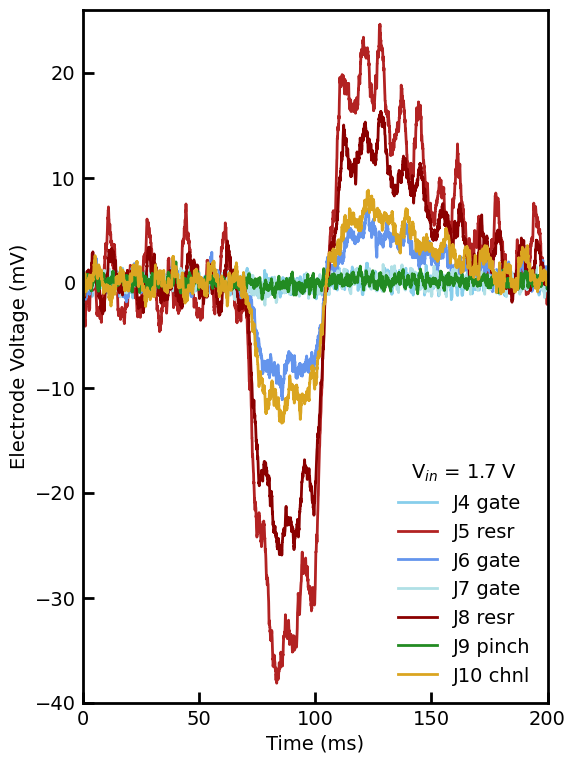

In [34]:
# Parameters
j_values = ['J-4', 'J-5', 'J-6', 'J-7', 'J-8', 'J-9', 'J-10']
j_colors = ['skyblue', 'firebrick', 'cornflowerblue', 'powderblue',
            'darkred', 'forestgreen', 'goldenrod']
j_labels = ['J4 gate', 'J5 resr', 'J6 gate', 'J7 gate', 'J8 resr',
             'J9 pinch', 'J10 chnl']
base_path = 'data/2025-11-18/2025-11-18_Filament_Scope_Sweep_'
target_voltage = 1.7  # Voltage for line cut
colors = cm.get_cmap('Blues', len(j_values))  # Distinct colors

linecuts = []
times = None

def smooth_curve(data, window_size=5):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='same')


window_size = 10
for i, j in enumerate(j_values):
    filename = base_path + j
    results = load_experiment_data(filename)
    
    volts   = results["table_measurements"][:,0].astype(float)
    seconds = results["table_measurements"][:,1].astype(float)
    oscfila = results["table_measurements"][:,2].astype(float)
    oscvolt = results["table_measurements"][:,3].astype(float)

    # Reshape
    loop_count = len(np.unique(volts))
    num_xvals = len(volts) // loop_count
    osc_vo = oscvolt.reshape(loop_count, num_xvals)
    voltages = np.unique(volts)
    
    # Find closest voltage index
    idx = np.argmin(np.abs(voltages - target_voltage))
    linecut = osc_vo[idx, :] * 1e3  # Electrode in mV
    linecuts.append(linecut)
    
    if times is None:
        times = np.unique(seconds) * 1e3  # ms

# Plot all line cuts together
fig, ax = plt.subplots(figsize=(6, 9))
for i, linecut in enumerate(linecuts):
    smooth = smooth_curve(linecut, window_size=window_size)
    ax.plot(times, smooth, color=j_colors[i], linewidth=2, label=j_labels[i])


for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

ax.tick_params(axis='both', length=8, width=2, labelsize=14, direction='in',
               pad=5)
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Electrode Voltage (mV)', fontsize=14)
ax.set_xlim(0, 200)
ax.set_ylim(-40, 26)
ax.legend(title=f'V$_{{in}}$ = {target_voltage:.1f} V', fontsize=14, frameon=False,
          title_fontsize=14, loc='lower right')

save_path = create_save_path('data/2025-11-18/combined_linecuts', fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')


## **Filing Curve**

In [4]:
# Import data via the load experiment function
filename = 'data/2025-11-25/2025-11-25_vna_filling_curve_data'
results = load_experiment_data(filename)

# Extract the results
seconds = results["table_measurements"][:,0].astype(float)
press_1 = results["table_measurements"][:,2].astype(float)
press_2 = results["table_measurements"][:,3].astype(float)
vnafreq = results["table_measurements"][:,4].astype(float)
vnareal = results["table_measurements"][:,5].astype(float)
vnaimag = results["table_measurements"][:,6].astype(float)

# Convert to plotting shapes
vnamagn = 20*np.log10(np.sqrt(vnareal**2 + vnaimag**2))
pts_in_sweep = len(np.unique(vnafreq))
num_sweeps = len(vnamagn) // pts_in_sweep

fill_v = vnamagn.reshape(num_sweeps, pts_in_sweep)  # shape: (sweeps, points)
fill_s = seconds[::pts_in_sweep]  # take every 401st value
fill_f = np.unique(vnafreq) * 1e-9  # frequencies in GHz
fill_1 = press_1[::pts_in_sweep]    # one pressure per sweep
fill_2 = press_2[::pts_in_sweep]    # one pressure per sweep

p_cond = np.max(fill_1) - fill_1
cc_cnd = p_cond * 0.03263 # cc condensed from our tank

# Saving figure
save_path = create_save_path(filename, fig_type='jpg')

C:\Users\LHQS3\AppData\Local\Temp\ipykernel_16356\628916573.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma_segment = cm.get_cmap('viridis_r')
C:\Users\LHQS3\AppData\Local\Temp\ipykernel_16356\628916573.py:18: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax1.pcolormesh(p_cond, fill_f, fill_v.T, shading='nearest',


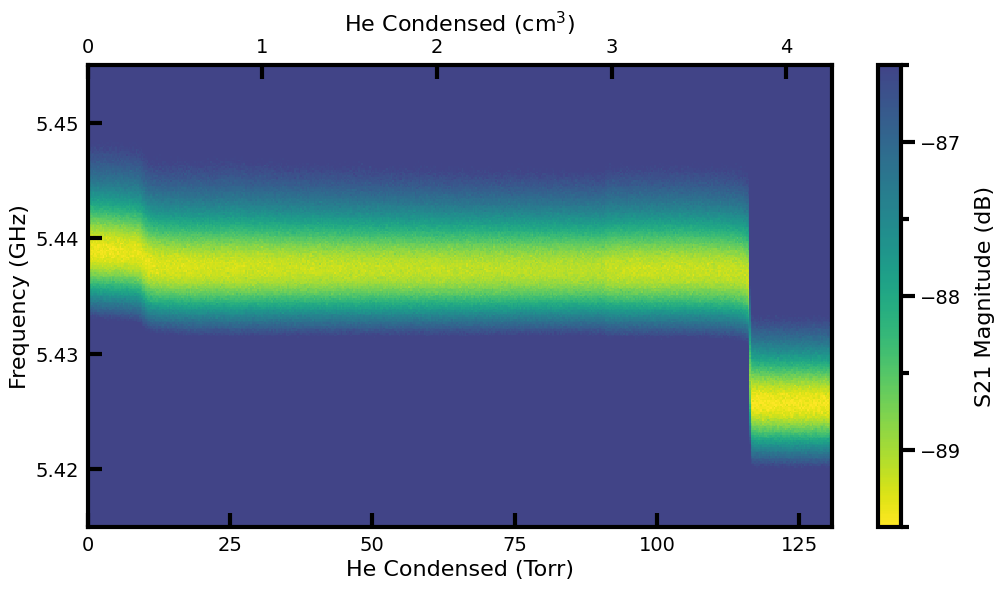

In [44]:
from matplotlib.ticker import MultipleLocator, NullFormatter
fig, ax1 = plt.subplots(figsize=(12, 6))

line_w = 3
font_t = 14
font_l = 16
line_l = 10

# Main plot
magma_segment = cm.get_cmap('viridis_r')
magma_segment = mcolors.LinearSegmentedColormap.from_list(
    'magma_segment', magma_segment(np.linspace(0, 0.8, 256))
)

cmap = magma_segment

# Torr condensed x-axis
pcm = ax1.pcolormesh(p_cond, fill_f, fill_v.T, shading='nearest', 
                     cmap=cmap, vmin=-89.5, vmax=-86.5)
ax1.set_xlabel('He Condensed (Torr)', fontsize=font_l, color='black')
ax1.set_ylabel('Frequency (GHz)', fontsize=font_l, color='black')
ax1.set_ylim(5.415, 5.455)
ax1.set_yticks([5.42, 5.43, 5.44, 5.45])
ax1.set_xticks([0, 25, 50, 75, 100, 125])
ax1.tick_params(axis='both', which='major', length=line_l, width=line_w, 
                labelsize=font_t, color='black', direction='in', pad=6)

# Colorbar
cbar = plt.colorbar(pcm, ax=ax1)
cbar.ax.tick_params(axis='y', length=line_l, width=line_w, labelsize=font_t)
cbar.set_label('S21 Magnitude (dB)', fontsize=font_l, labelpad=10)

cbar.set_ticks([ -89, -88, -87])
cbar.minorticks_on()
cbar.ax.yaxis.set_minor_locator(MultipleLocator(0.5))
cbar.ax.yaxis.set_minor_formatter(NullFormatter())
cbar.ax.yaxis.set_tick_params(which='minor', length=line_l*0.6, width=line_w,
                              direction='out', color='black')

cbar.ax.yaxis.set_tick_params(width=line_w, length=line_l, direction='out', 
                              color='black')

# Spines
for spine in ax1.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')
for spine in cbar.ax.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')

# cubic centimeters condensed x-axis
ax2 = ax1.twiny() 
ax2.set_xlim(0, cc_cnd[-1])
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xlabel(r'He Condensed (cm$^3$)', fontsize=font_l, color='black')
ax2.tick_params(axis='x', length=line_l, width=line_w, labelsize=font_t, 
                color='black', direction='in', pad=6)

save_path = create_save_path(filename, fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

In [33]:
cc_cnd[7991]

3.263137045999999

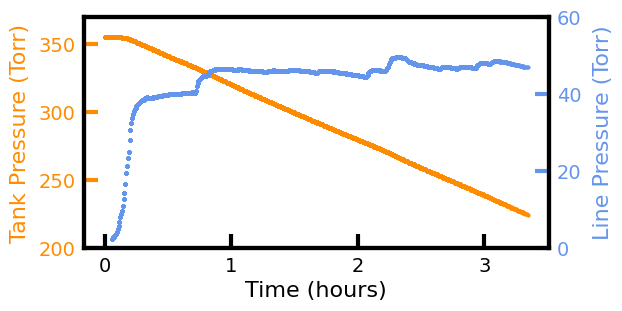

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 3))

# First y-axis (Pressure1)
ax1.plot(fill_s/3600, fill_1, 'o', color='darkorange', markersize=2)
ax1.set_xlabel('Time (hours)', fontsize=font_l)
ax1.set_ylabel('Tank Pressure (Torr)', color='darkorange', fontsize=font_l,
               labelpad=6)
ax1.set_ylim(200,370)
ax1.set_yticks([200, 250, 300, 350])
ax1.set_xticks([0, 1, 2, 3])
ax1.tick_params(axis='y', colors='darkorange', labelsize=font_t, length=line_l,
                width=line_w)

# Second y-axis (Pressure2)
ax2 = ax1.twinx()
ax2.plot(fill_s/3600, fill_2, 'o', color='cornflowerblue', markersize=2)
ax2.set_ylabel('Line Pressure (Torr)', color='cornflowerblue', fontsize=font_l,
               labelpad=8)
ax2.set_ylim(0,60)
ax2.set_yticks([0, 20, 40, 60])
ax2.tick_params(axis='y', colors='cornflowerblue', labelsize=font_t, length=line_l,
                width=line_w)
# Optional: style x-axis ticks
ax1.tick_params(axis='x', length=line_l, width=line_w, labelsize=font_t,
                 direction='in', pad=6, colors='black')
ax1.tick_params(axis='y', length=line_l, width=line_w, labelsize=font_t,
                 direction='in', pad=6, colors='darkorange')
ax2.tick_params(axis='y', length=line_l, width=line_w, labelsize=font_t,
                 direction='in', pad=6, colors='cornflowerblue')

# Spine formatting
for spine in ax1.spines.values():
    spine.set_linewidth(line_w)
for spine in ax2.spines.values():
    spine.set_linewidth(line_w)
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')

save_path = create_save_path(filename, fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

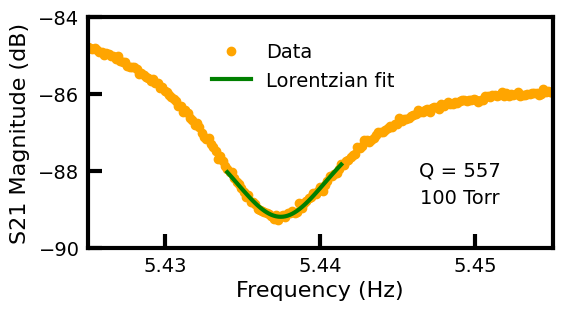

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

# Selecting linecut data
p_cond_idx = 7991  
cut_y = fill_v[p_cond_idx, 160:210]
cut_f = fill_f[160:210]

# Fit Lorentzian to the cut data
p0_guess = [6, 5.437, 0.005, -89]
popt = fit_data(cut_f, cut_y, fit_type='lorz_inv', user_guess=p0_guess)[0]
lor  = lorz_inv(cut_f, *popt)

# Data and fit lines
ax.plot(fill_f, fill_v[p_cond_idx, :], 'o',
        color='orange', markersize=6, label='Data')
ax.plot(cut_f, lor, color='green', linestyle='-',
        linewidth=3, label='Lorentzian fit')

# Axis labels (adjust text as needed)
ax.set_xlabel('Frequency (Hz)', fontsize=font_l)
ax.set_ylabel('S21 Magnitude (dB)', color='black',
              fontsize=font_l, labelpad=6)


ax.set_xlim(5.42,5.46)
ax.set_ylim(-90,-84)
ax.set_yticks([-90, -88, -86, -84])
ax.set_xlim(5.425, 5.455)
ax.set_xticks([5.43, 5.44, 5.45])

ax.text(5.449, -88, f'Q = {int(popt[1]/popt[2])}', color='black',
        fontsize=font_t, ha='center', va='center')
ax.text(5.449, -88.7, '100 Torr', color='black',
        fontsize=font_t, ha='center', va='center')


# Style ticks to match your other figure
ax.tick_params(axis='both', length=line_l, width=line_w, labelsize=font_t,
               direction='in', pad=6, colors='black')

# Spine formatting (consistent widths, neutral spine color)
for spine in ax.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')

# Legend (optional, styled)
ax.legend(frameon=False, fontsize=font_t, loc=(0.25, 0.65))


save_path = create_save_path(filename, fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

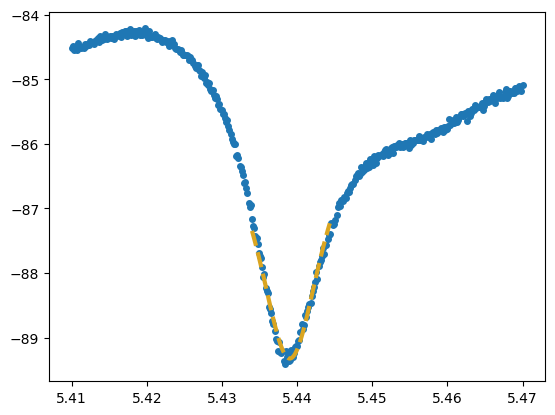

In [ ]:
p_cond_idx = 50
cut_f = fill_v[p_cond_idx, 160:230]
cut_y = fill_f[160:230]

p0_guess = [6, 5.437, 0.005, -89]
popt = fit_data(cut_y, cut_f, fit_type='lorz_inv', user_guess=p0_guess)[0]
lor  = lorz_inv(cut_y, *popt)

plt.plot(fill_f, fill_v[p_cond_idx, :], 'o', markersize=4)
plt.plot(cut_y, lor, color='goldenrod', linestyle='--', linewidth=3)

(401,)

Text(0.5, 1.0, 'Inverse Lorentzian Fits (Variable Windows)')

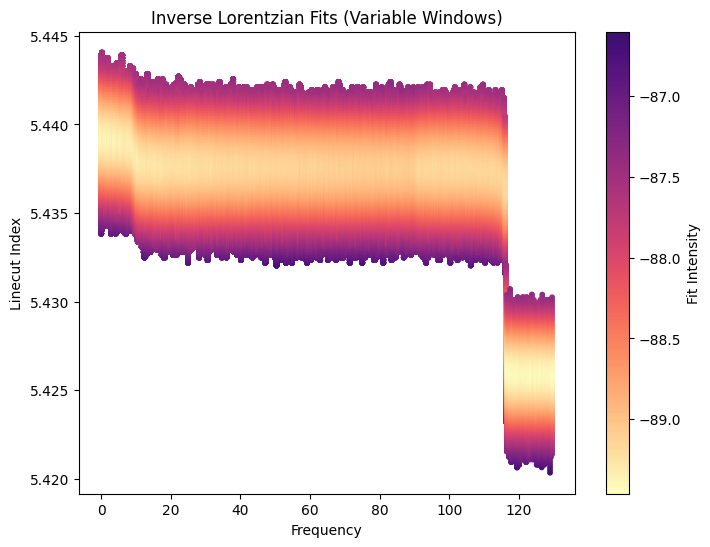

In [241]:
# Parameters
window_size = 30               # number of points on each side of the minimum
num_lines   = fill_v.shape[0]  # number of linecuts
X, Y, Z     = [], [], []
center_f    = []

for idx in range(len(p_cond)):
    linecut = fill_v[idx, :]
    min_idx = np.argmin(linecut)
    start_idx = max(min_idx - window_size, 0)
    end_idx = min(min_idx + window_size, len(linecut))
    
    cut_v = linecut[start_idx:end_idx]
    cut_f = fill_f[start_idx:end_idx]
    
    p0_guess = [6, fill_f[min_idx], 0.005, -89]
    popt = fit_data(cut_f, cut_v, fit_type='lorz_inv', user_guess=p0_guess)[0]
    lor_curve = lorz_inv(cut_f, *popt)
    center_f.append(popt[1])
    
    # Append for scatter/pcolormesh
    X.extend(cut_f)
    Y.extend([p_cond[idx]] * len(cut_f))
    Z.extend(lor_curve)

# Convert to arrays
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

plt.figure(figsize=(8, 6))
plt.scatter(Y, X, c=Z.T, cmap=magma_segment, s=10)
plt.colorbar(label='Fit Intensity')
plt.xlabel('Frequency')
plt.ylabel('Linecut Index')
plt.title('Inverse Lorentzian Fits (Variable Windows)')


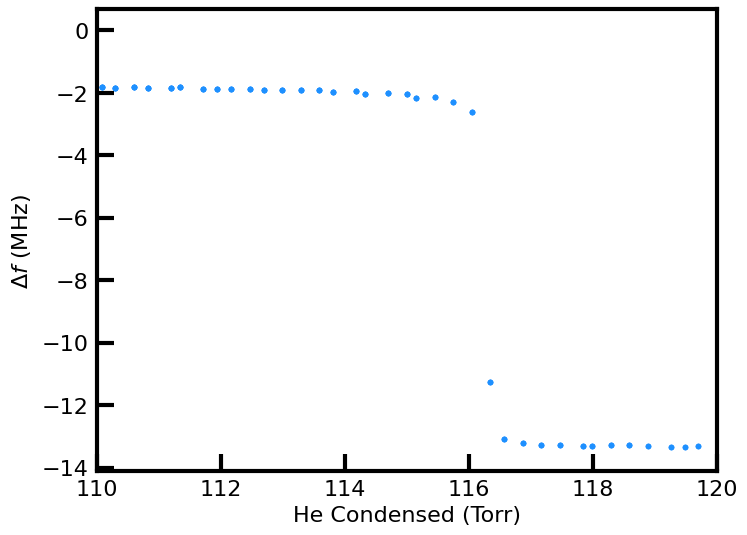

In [269]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# First y-axis (Pressure1)
ax1.plot(p_cond,(center_f - center_f[0])*1e3, 'o', color='dodgerblue', markersize=3)
ax1.set_xlabel('He Condensed (Torr)', fontsize=16)
ax1.set_ylabel(r'$\Delta f$ (MHz)', fontsize=16, labelpad=6)
#ax1.set_ylim(-2,0)
#ax1.set_yticks([-15,-10,-5,0])
ax1.set_xlim(110,120)

ax1.tick_params(axis='both', length=12, width=3, labelsize=16,
                 direction='in', pad=6, colors='black')

# Spine formatting
for spine in ax1.spines.values():
    spine.set_linewidth(3)

In [52]:
elec   = 1.602e-19  # C
eps_he = 1.058
eps_0  = 8.854e-12  # F/m
alpha  = 3.7e-4     # N/m
rho    = 145        # kg/m^3
n_s    = 2e13       # 1/m^2
z      = 3e-3       # m

R = alpha / (z*rho*9.81 + n_s**2*elec**2/(2*eps_he*eps_0))
print(R*1e6)

76.83863432295473


In [57]:
w = 8
R = 76.7

d = 1.4 - R + np.sqrt(R**2 - (w/2)**2)
print(d)

1.295626507001046


In [ ]:
(1.5-1.17)/1.4

0.16428571428571428

0.032630508966514926

## **Electron Firing**

In [47]:
# Import data via the load experiment function
filename = 'data/2026-02-03/2026-02-03_VNA_QuickScan_-4'
results = load_experiment_data(filename)

# Extract the results
seconds = results["table_measurements"][:,0].astype(float)
press_1 = results["table_measurements"][:,2].astype(float)
press_2 = results["table_measurements"][:,3].astype(float)
vnafreq = results["table_measurements"][:,4].astype(float)
vnareal = results["table_measurements"][:,5].astype(float)
vnaimag = results["table_measurements"][:,6].astype(float)

# Convert to plotting shapes
vnamagn = 20*np.log10(np.sqrt(vnareal**2 + vnaimag**2))
pts_in_sweep = len(np.unique(vnafreq))
num_sweeps = len(vnamagn) // pts_in_sweep

fill_v = vnamagn.reshape(num_sweeps, pts_in_sweep)  # shape: (sweeps, points)
fill_s = seconds[::pts_in_sweep]  # take every 401st value
fill_f = np.unique(vnafreq) * 1e-9  # frequencies in GHz
fill_1 = press_1[::pts_in_sweep]    # one pressure per sweep
fill_2 = press_2[::pts_in_sweep]    # one pressure per sweep

p_cond = np.max(fill_1) - fill_1
cc_cnd = p_cond * 0.03263 # cc condensed from our tank

# Saving figure
save_path = create_save_path(filename, fig_type='jpg')

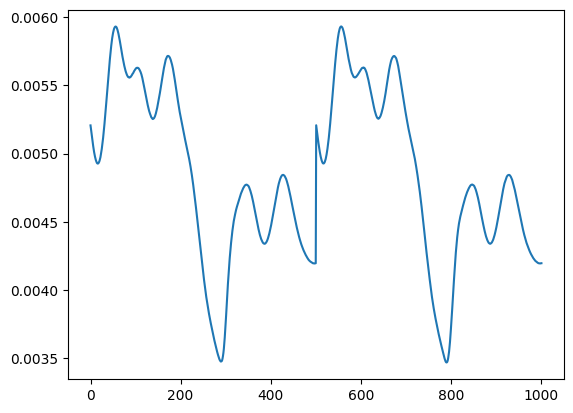

In [50]:
plt.plot(vnareal**2 + vnaimag**2)

C:\Users\LHQS3\AppData\Local\Temp\ipykernel_14852\1909961404.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma_segment = cm.get_cmap('magma_r')


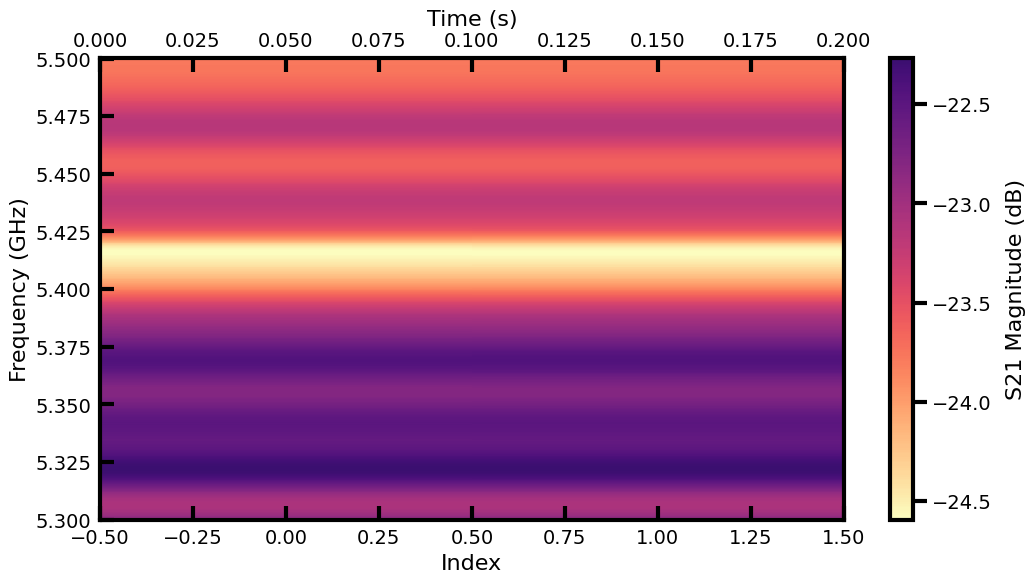

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 6))

line_w = 3
font_t = 14
font_l = 16
line_l = 10

# Main plot
magma_segment = cm.get_cmap('magma_r')
magma_segment = mcolors.LinearSegmentedColormap.from_list(
    'magma_segment', magma_segment(np.linspace(0, 0.80, 256))
)

# X-axis as integers
idx = np.arange(len(p_cond))

# Select: idx or p_cond for x-axis
pcm = ax1.pcolormesh(idx, fill_f, fill_v.T, shading='nearest', 
                     cmap=magma_segment, 
                     #vmin=-87, vmax=-83,
                     )
ax1.set_xlabel('Index', fontsize=font_l, color='black')
ax1.set_ylabel('Frequency (GHz)', fontsize=font_l, color='black')
#ax1.set_ylim(5.39, 5.44)
#ax1.set_yticks([5.42, 5.43, 5.44, 5.45])
#ax1.set_xticks([0, 25, 50, 75, 100, 125])
ax1.tick_params(axis='both', which='major', length=line_l, width=line_w, 
                labelsize=font_t, color='black', direction='in', pad=6)

# Colorbar
cbar = plt.colorbar(pcm, ax=ax1)
cbar.ax.tick_params(axis='y', length=line_l, width=line_w, labelsize=font_t)
cbar.set_label('S21 Magnitude (dB)', fontsize=font_l, labelpad=10)
#cbar.set_ticks([-90, -89, -88, -87, -86])
cbar.ax.yaxis.set_tick_params(width=line_w, length=line_l, direction='out', 
                              color='black')

#ax1.set_xlim(0,50)

# Spines
for spine in ax1.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')
for spine in cbar.ax.spines.values():
    spine.set_linewidth(line_w)
    spine.set_color('black')

# cubic centimeters condensed x-axis

#for i in range(11):
#    ax1.vlines(97*i + 295, 5.39, 5.43, colors='white', lw=2)

ax2 = ax1.twiny() 
ax2.set_xlim(0, idx[-1]/5)
#ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xlabel('Time (s)', fontsize=font_l, color='black')
ax2.tick_params(axis='x', length=line_l, width=line_w, labelsize=font_t, 
                color='black', direction='in', pad=6)

save_path = create_save_path(filename, fig_type='jpg')
#fig.savefig(save_path, dpi=500, bbox_inches='tight')

## **Bragg-Cherenkov Data Plots**

In [393]:
# Import data via the load experiment function
filename = 'data/2023-09-17/2023-09-17_sweep_P36'
results = load_experiment_data(filename)

# Extract the results
meta  = results["metadata"]
step  = results["step"]
sweep = results["sweep"]
data  = results["data"]

# Get the sweep header and type
sw_header = results["sweep_headers"]
sw_type = sw_header[0].lower() if sw_header else 'unknown'

# Saving figure
save_path = create_save_path(filename, fig_type='jpg')

In [394]:
# Unpackage data
x = data[:,0]   # step vals
y = data[:,1]   # sweep vals

r = data[:,2]   # X component
i = data[:,3]   # Y component

# Step and sweep values
st = step[:,1]   # V
sw = sweep[:]/4  # mV

# Reshape data to a 2D z-array
zr = r.reshape(len(np.unique(y)), len(np.unique(x)))
zi = i.reshape(len(np.unique(y)), len(np.unique(x)))

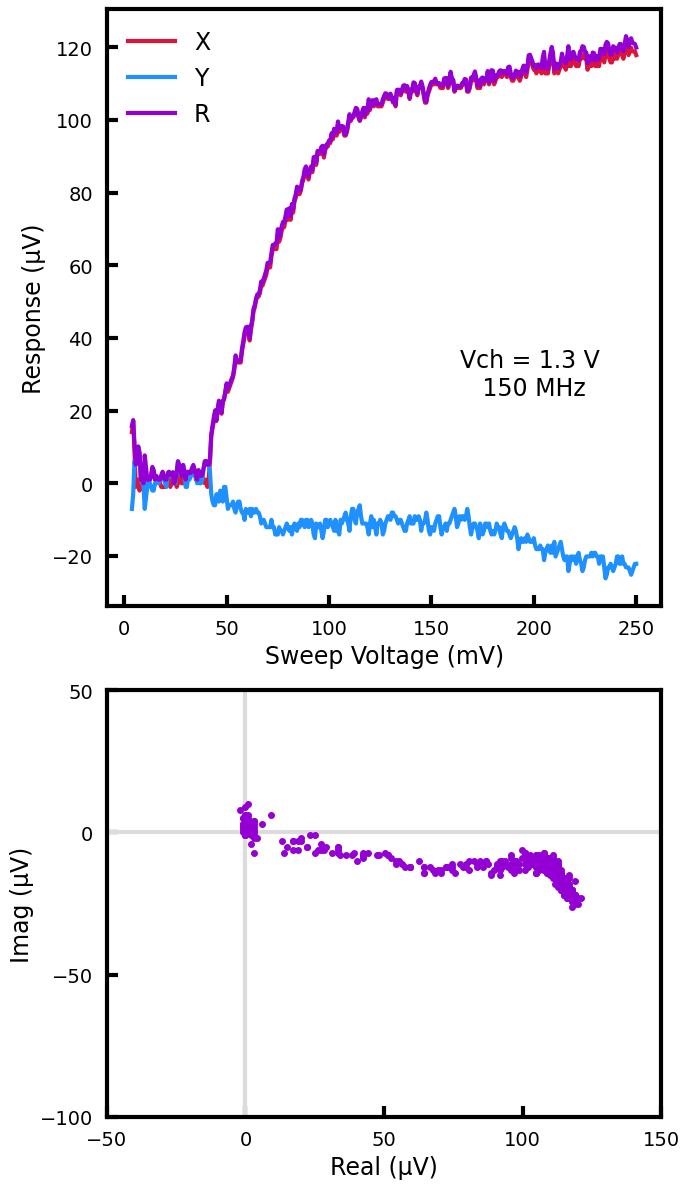

In [397]:
# Original data
X = (zr[20,4:] - zr[0,4:]) * 1e6
Y = (zi[20,4:] - zi[0,4:]) * 1e6
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)
voltage = sweep[4:] * 250


fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(7, 12),
    gridspec_kw={'height_ratios': [1.4, 1]}
    )

# Cartesian subplot 
ax1.plot(voltage, X, label='X', color='crimson', linewidth=3)
ax1.plot(voltage, Y, label='Y', color='dodgerblue', linewidth=3)
ax1.plot(voltage, r, label='R', color='darkviolet', linewidth=3)
ax1.set_xlabel('Sweep Voltage (mV)', fontsize=17)
ax1.set_ylabel('Response (µV)', fontsize=17)
ax1.legend(fontsize=17, frameon=False)
ax1.text(200, 30, f'Vch = {step[20,0]} V \n 150 MHz ', color='black', 
         fontsize=17, ha='center', va='center')
ax1.tick_params(axis='both', length=8, width=3, labelsize=14, 
                direction='in', pad=10)

# Polar subplot

# --- Complex Plane Plot ---
ax2.axhline(0, color='gainsboro', linewidth=3)
ax2.axvline(0, color='gainsboro', linewidth=3)
ax2.plot(X, Y, 'o', markersize=4, color='darkviolet')
ax2.set_xlabel('Real (µV)', fontsize=17)
ax2.set_ylabel('Imag (µV)', fontsize=17)
ax2.set_ylim(-100,50)
ax2.set_xlim(-50,150)
ax2.set_xticks([-50,0,50,100,150])
ax2.set_yticks([-100,-50,0,50])
ax2.tick_params(axis='both', length=8, width=3, labelsize=14, 
                direction='in', pad=10)

for spine in ax1.spines.values():
    spine.set_linewidth(3)
    spine.set_color('black')
for spine in ax2.spines.values():
    spine.set_linewidth(3)
    spine.set_color('black')

plt.tight_layout()
plt.show()

